In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Mentorness Internship/Task 3/MarketPricePrediction.csv')

In [4]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [5]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [7]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10227.0,2009.022294,4.372841,1996.0,2006.0,2009.0,2013.0,2016.0
quantity,10227.0,76604.880023,124408.698759,20.0,8898.0,27460.0,88356.5,1639032.0
priceMin,10227.0,646.944363,673.121850,16.0,209.0,440.0,828.0,6000.0
priceMax,10227.0,1212.760731,979.658874,145.0,557.0,923.0,1527.0,8192.0
priceMod,10227.0,984.284345,818.471498,80.0,448.0,747.0,1248.0,6400.0


In [9]:
data.duplicated().sum()

0

In [10]:
data.apply(lambda x: x.unique())

market      [ABOHAR(PB), AGRA(UP), AHMEDABAD(GUJ), AHMEDNA...
month       [January, February, March, April, May, June, J...
year        [2005, 2006, 2010, 2011, 2012, 2013, 2014, 201...
quantity    [2350, 900, 790, 245, 1035, 675, 440, 1305, 14...
priceMin    [404, 487, 1283, 3067, 523, 1327, 1025, 1309, ...
priceMax    [493, 638, 1592, 3750, 686, 1900, 1481, 1858, ...
priceMod    [446, 563, 1460, 3433, 605, 1605, 1256, 1613, ...
state       [PB, UP, GUJ, MS, RAJ, KNT, MP, OR, BHR, WB, C...
city        [ABOHAR, AGRA, AHMEDABAD, AHMEDNAGAR, AJMER, A...
date        [January-2005, January-2006, January-2010, Jan...
dtype: object

In [11]:
data.apply(lambda x: len(x.unique()))

market       120
month         12
year          21
quantity    8641
priceMin    2026
priceMax    2732
priceMod    2424
state         21
city         117
date         242
dtype: int64

In [12]:
data['date']=pd.to_datetime(data['date'])

In [13]:
data.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [14]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [15]:
data.set_index('date',inplace=True)

In [16]:
data.sort_index(inplace=True)

In [17]:
data.iloc[7030:7070]

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2012-05-01,JODHPUR(RAJ),May,2012,24617,237,426,330,RAJ,JODHPUR
2012-05-01,JUNNAR(MS),May,2012,1485,300,600,400,MS,JUNNAR
2012-05-01,LONAND(MS),May,2012,500,150,430,375,MS,LONAND
2012-05-01,BHATINDA(PB),May,2012,12146,461,661,562,PB,BHATINDA
2012-05-01,RAJKOT(GUJ),May,2012,28788,153,461,319,GUJ,RAJKOT
2012-05-01,RAHURI(MS),May,2012,87609,100,603,351,MS,RAHURI
2012-05-01,PATNA,May,2012,500,575,650,613,BHR,PATNA
2012-05-01,KALVAN(MS),May,2012,38700,125,466,347,MS,KALVAN
2012-05-01,RAIPUR(CHGARH),May,2012,7480,453,545,501,HR,RAIPUR


In [18]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
def error(y_true,y_pred):
  print('MAE:',mean_absolute_error(y_true,y_pred))
  print('MSE:',mean_squared_error(y_true,y_pred))
  print('RMSE:',np.sqrt(mean_squared_error(y_true,y_pred)))

# **Quantity**

In [20]:
quantity_data=data['quantity'].groupby(['date']).sum('quantity').reset_index()

In [21]:
quantity_data.set_index('date',inplace=True)

<Axes: xlabel='date'>

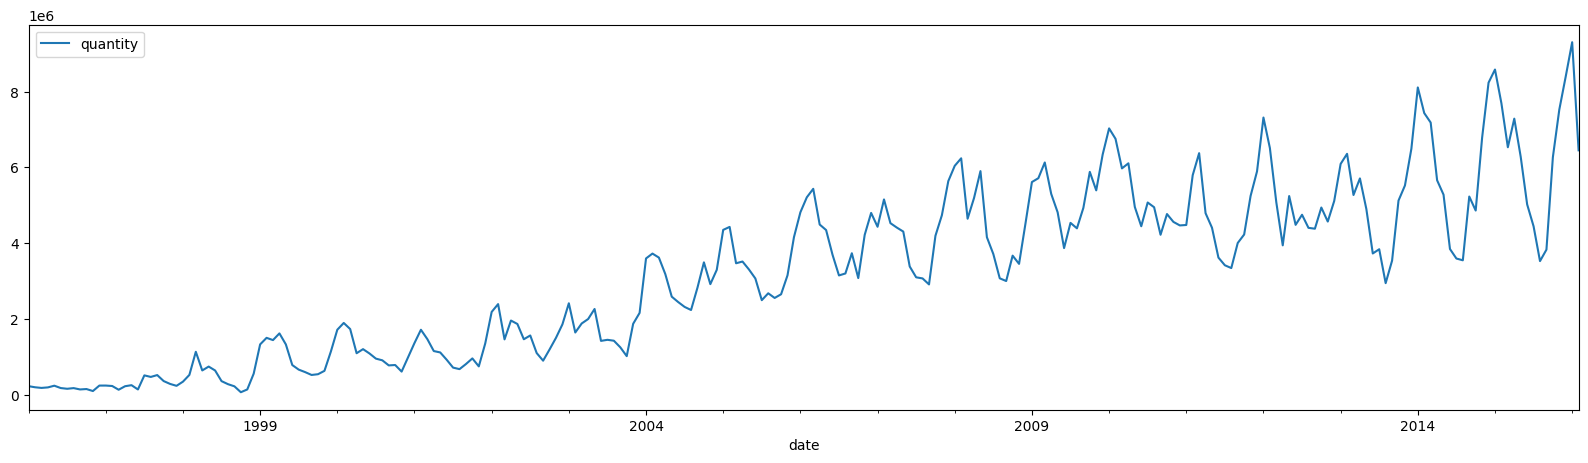

In [22]:
quantity_data.plot(figsize=(20,5))

In [23]:
adf_test(quantity_data)

ADF Statistics: -0.7025624281752985
p- value: 0.8460846942829232
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
a_ari=auto_arima(quantity_data,trace=True,suppress_warnings=True)
a_ari.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7089.949, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7162.256, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7159.248, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7159.540, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7160.604, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7164.389, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7163.206, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7087.100, Time=1.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7117.900, Time=0.68 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7080.829, Time=0.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7093.370, Time=0.35 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7083.017, Time=0.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=7093.816, Time=2.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=7163.540, Time=1.70 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3517.986
Date:                Thu, 30 May 2024   AIC                           7057.971
Time:                        14:28:01   BIC                           7096.304
Sample:                    01-01-1996   HQIC                          7073.415
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5910      0.204      2.901      0.004       0.192       0.990
ar.L2          0.4929      0.083      5.952      0.000       0.331       0.655
ar.L3         -0.0541      0.145     -0.375      0.708      -0.337       0.229
ar.L4         -0.9375      0.075    -12.516      0.000      -1.084      -0.791
ar.L5          0.2761      0.190      1.450      0.147      -0.097       0.649
ma.L1         -0.8482      0.164     -5.161      0.000      -1.170      -0.526
ma.L2         -0.5900      0.067     -8.845      0.000      -0.721      -0.459
ma.L3          0.2323      0.135      1.721      0.085      -0.032       0.497
ma.L4          1.0424      0.086     12.087      0.000       0.873       1.211
ma.L5         -0.6153      0.152     -4.057      0.000      -0.913      -0.318
sigma2      3.276e+11   1.39e-12   2.36e+23      0.000    3.28e+11    3.28e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                34.70
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               8.52   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.35e+38. Standard errors may be unstable.
"""

In [25]:
quantity_train=quantity_data.iloc[:int(len(quantity_data)*(70/100))]
quantity_test=quantity_data.iloc[int(len(quantity_data)*(70/100)):]

## 1. **ARIMA**

In [26]:
quantity_model_ARIMA=ARIMA(quantity_train['quantity'],order=(5,1,5))

In [27]:
quantity_model_Arima_fit=quantity_model_ARIMA.fit()

In [28]:
quantity_model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               quantity   No. Observations:                  169
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2408.623
Date:                Thu, 30 May 2024   AIC                           4839.247
Time:                        14:28:04   BIC                           4873.610
Sample:                    01-01-1996   HQIC                          4853.193
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3902      0.096     -4.058      0.000      -0.579      -0.202
ar.L2          0.5972      0.078      7.625      0.000       0.444       0.751
ar.L3          0.5652      0.087      6.478      0.000       0.394       0.736
ar.L4         -0.4160      0.066     -6.265      0.000      -0.546      -0.286
ar.L5         -0.9285      0.093    -10.035      0.000      -1.110      -0.747
ma.L1          0.2565      0.152      1.689      0.091      -0.041       0.554
ma.L2         -0.7913      0.154     -5.129      0.000      -1.094      -0.489
ma.L3         -0.5834      0.172     -3.391      0.001      -0.921      -0.246
ma.L4          0.3571      0.167      2.140      0.032       0.030       0.684
ma.L5          0.8688      0.145      5.983      0.000       0.584       1.153
sigma2      1.934e+11   1.45e-12   1.34e+23      0.000    1.93e+11    1.93e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):                14.92
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               5.47   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+38. Standard errors may be unstable.
"""

In [29]:
pred_start_date=quantity_test.index[0]
pred_end_date=quantity_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [30]:
quantity_arima_pred=quantity_model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
quantity_arima_residuals=quantity_test['quantity']-quantity_arima_pred

In [31]:
quantity_arima_residuals

date
2010-02-01   -1.855018e+05
2010-03-01   -1.186321e+06
2010-04-01   -7.884491e+05
2010-05-01   -1.229802e+06
2010-06-01   -1.578912e+06
                  ...     
2015-10-01    6.417589e+05
2015-11-01    1.854858e+06
2015-12-01    2.402659e+06
2016-01-01    3.060629e+06
2016-02-01   -1.919343e+03
Length: 73, dtype: float64

<Axes: xlabel='date'>

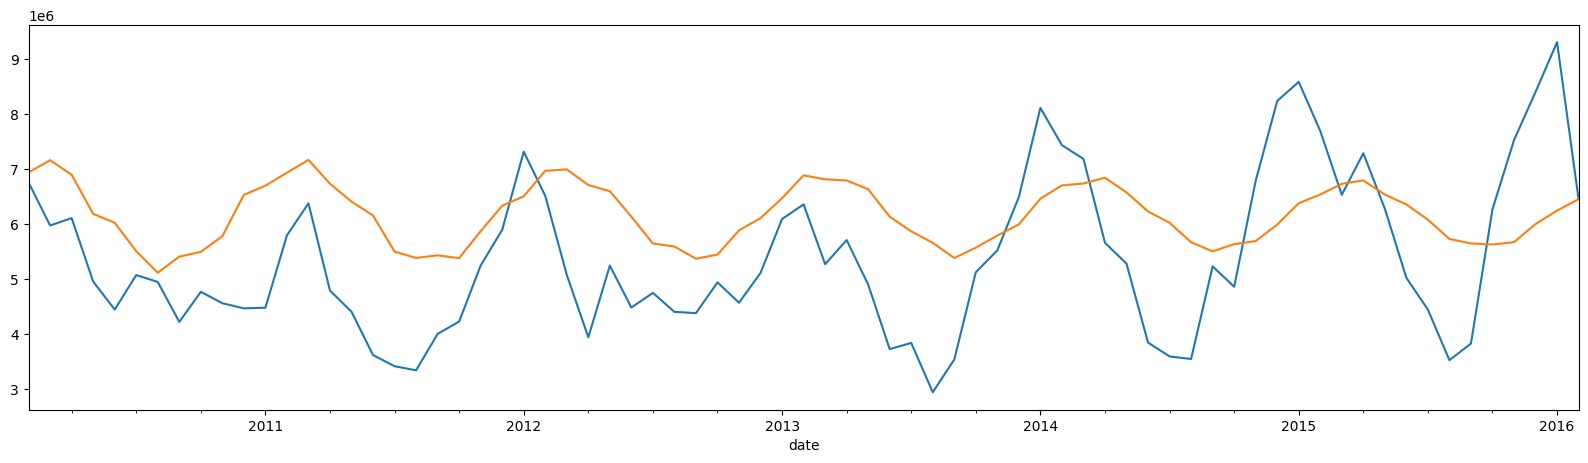

In [32]:
quantity_test['quantity'].plot(figsize=(20,5))
quantity_arima_pred.plot(figsize=(20,5))

In [33]:
error(quantity_test['quantity'],quantity_arima_pred)

MAE: 1306560.2582494856
MSE: 2278322464610.879
RMSE: 1509411.2973642668


## 2. **SRIMAX**

In [34]:
quantity_model_SARIMA=SARIMAX(quantity_train['quantity'],order=(5,1,5),seasonal_order=(0,0,0,12))

In [35]:
quantity_model_SARIMA_fit=quantity_model_SARIMA.fit()

In [36]:
quantity_model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               quantity   No. Observations:                  169
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2408.623
Date:                Thu, 30 May 2024   AIC                           4839.247
Time:                        14:28:06   BIC                           4873.610
Sample:                    01-01-1996   HQIC                          4853.193
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3902      0.096     -4.058      0.000      -0.579      -0.202
ar.L2          0.5972      0.078      7.625      0.000       0.444       0.751
ar.L3          0.5652      0.087      6.478      0.000       0.394       0.736
ar.L4         -0.4160      0.066     -6.265      0.000      -0.546      -0.286
ar.L5         -0.9285      0.093    -10.035      0.000      -1.110      -0.747
ma.L1          0.2565      0.152      1.689      0.091      -0.041       0.554
ma.L2         -0.7913      0.154     -5.129      0.000      -1.094      -0.489
ma.L3         -0.5834      0.172     -3.391      0.001      -0.921      -0.246
ma.L4          0.3571      0.167      2.140      0.032       0.030       0.684
ma.L5          0.8688      0.145      5.983      0.000       0.584       1.153
sigma2      1.934e+11   1.45e-12   1.34e+23      0.000    1.93e+11    1.93e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):                14.92
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               5.47   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+38. Standard errors may be unstable.
"""

In [37]:
pred_start_date=quantity_test.index[0]
pred_end_date=quantity_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [38]:
quantity_srimax_pred=quantity_model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
quantity_srimax_residuals=quantity_test['quantity']-quantity_srimax_pred

In [39]:
quantity_srimax_residuals

date
2010-02-01   -1.855018e+05
2010-03-01   -1.186321e+06
2010-04-01   -7.884491e+05
2010-05-01   -1.229802e+06
2010-06-01   -1.578912e+06
                  ...     
2015-10-01    6.417589e+05
2015-11-01    1.854858e+06
2015-12-01    2.402659e+06
2016-01-01    3.060629e+06
2016-02-01   -1.919343e+03
Length: 73, dtype: float64

<Axes: xlabel='date'>

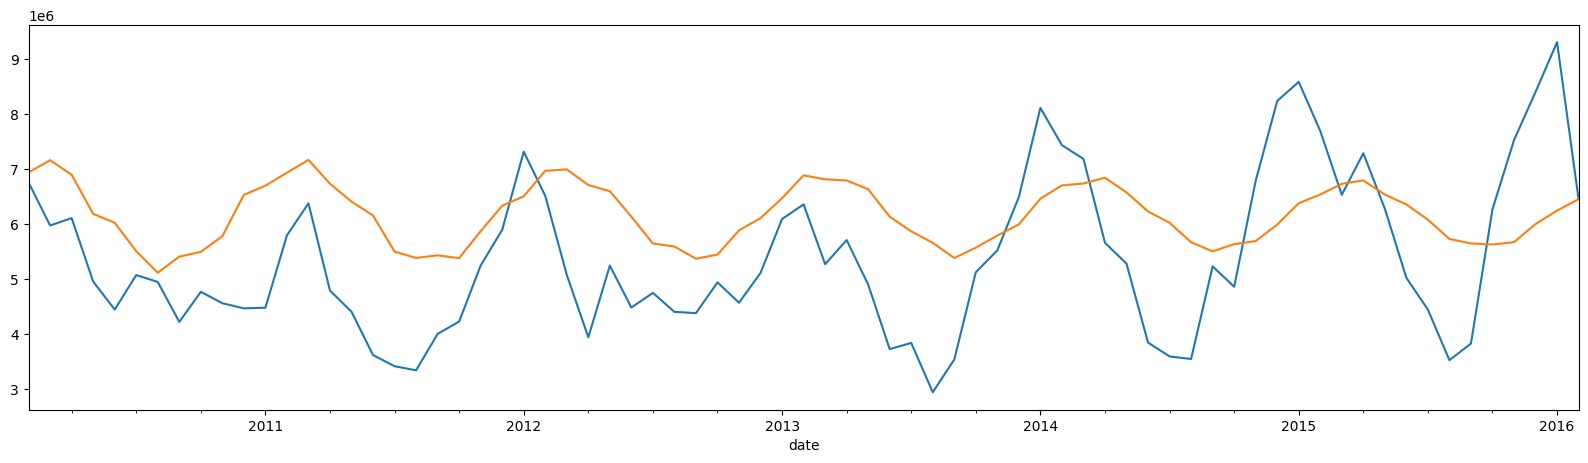

In [40]:
quantity_test['quantity'].plot(figsize=(20,5))
quantity_srimax_pred.plot(figsize=(20,5))

In [41]:
error(quantity_test['quantity'],quantity_srimax_pred)

MAE: 1306560.2582494856
MSE: 2278322464610.879
RMSE: 1509411.2973642668


## 3. **Prophet**

In [42]:
ph_quantity_train=quantity_train.reset_index()
ph_quantity_train.columns = ['ds','y']

In [43]:
quantity_m = Prophet()
quantity_m.fit(ph_quantity_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/xq57u1vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/z8yab574.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21761', 'data', 'file=/tmp/tmpqz1odgjr/xq57u1vc.json', 'init=/tmp/tmpqz1odgjr/z8yab574.json', 'output', 'file=/tmp/tmpqz1odgjr/prophet_modellm4qncr3/prophet_model-20240530142807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
quantity_future = quantity_m.make_future_dataframe(periods=73,freq='M')
quantity_future.tail()

,ds
237,2015-09-30
238,2015-10-31
239,2015-11-30
240,2015-12-31
241,2016-01-31


In [45]:
quantity_forecast = quantity_m.predict(quantity_future)
quantity_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
237,2015-09-30,8.416975e+06,7.036140e+06,8.295129e+06,8.264075e+06,8.589955e+06,-767191.417585,-767191.417585,-767191.417585,-767191.417585,-767191.417585,-767191.417585,0.0,0.0,0.0,7.649783e+06
238,2015-10-31,8.459750e+06,7.715754e+06,9.008343e+06,8.301564e+06,8.636320e+06,-104585.886624,-104585.886624,-104585.886624,-104585.886624,-104585.886624,-104585.886624,0.0,0.0,0.0,8.355164e+06
239,2015-11-30,8.501146e+06,8.191646e+06,9.419487e+06,8.338331e+06,8.683088e+06,291820.023993,291820.023993,291820.023993,291820.023993,291820.023993,291820.023993,0.0,0.0,0.0,8.792966e+06
240,2015-12-31,8.543921e+06,8.655404e+06,9.903866e+06,8.375998e+06,8.726654e+06,748082.077407,748082.077407,748082.077407,748082.077407,748082.077407,748082.077407,0.0,0.0,0.0,9.292003e+06
241,2016-01-31,8.586697e+06,8.709272e+06,1.000844e+07,8.413960e+06,8.771912e+06,784562.199036,784562.199036,784562.199036,784562.199036,784562.199036,784562.199036,0.0,0.0,0.0,9.371259e+06


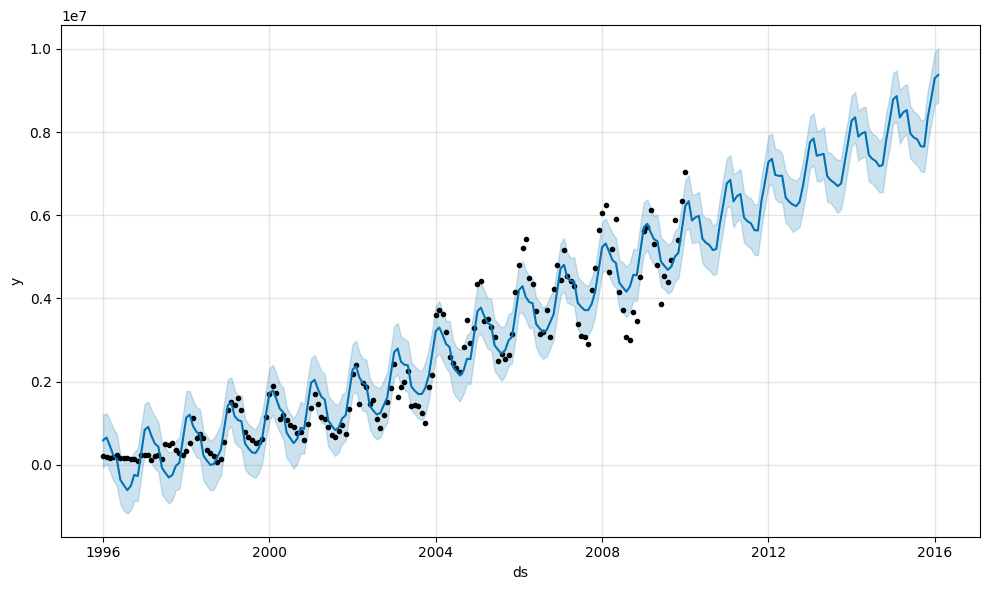

In [46]:
quantity_fig1 = quantity_m.plot(quantity_forecast)

<Axes: xlabel='ds'>

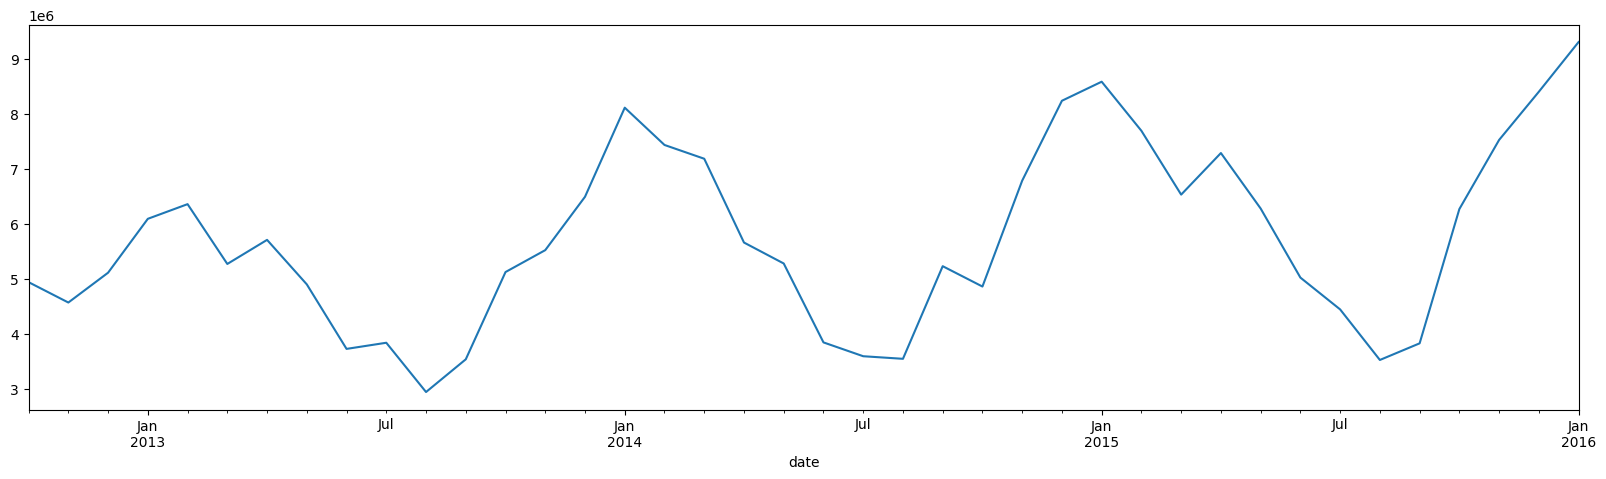

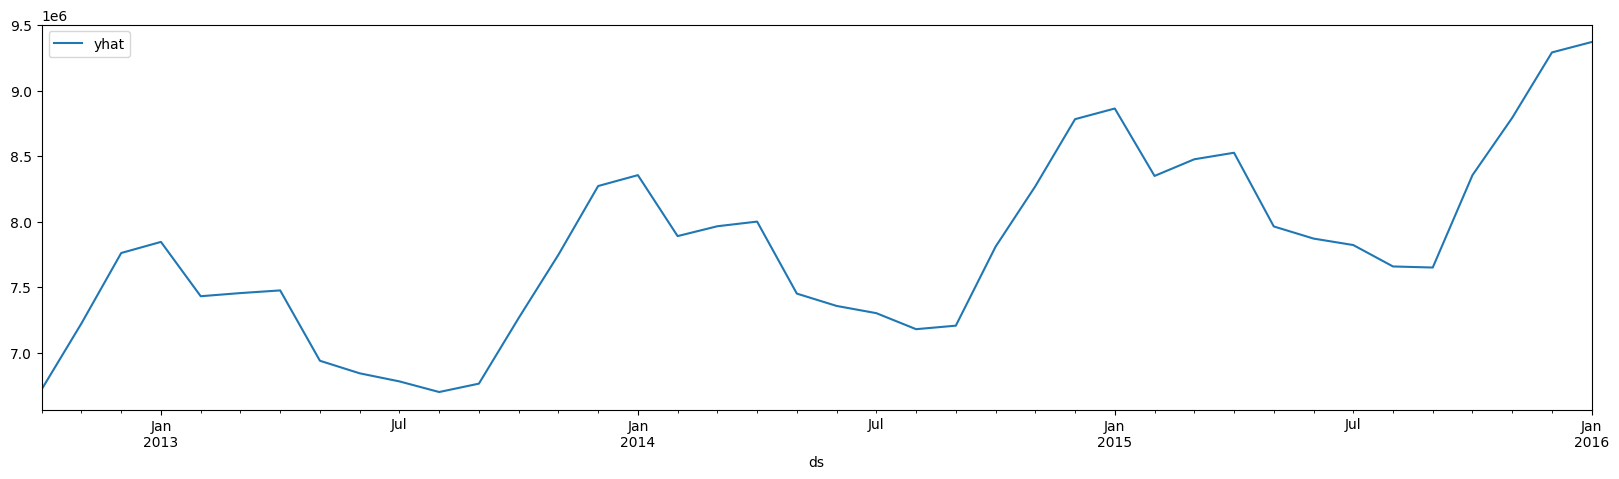

In [47]:
quantity_test['quantity'].loc['2012-10-01':'2016-01-01'].plot(figsize=(20,5))
quantity_forecast[['ds','yhat']].loc['2010-01-31':].set_index('ds').plot(figsize=(20,5))

# **PriceMin**

In [48]:
pricemin_data=data['priceMin'].groupby('date').min('priceMin').reset_index()

In [49]:
pricemin_data.set_index('date',inplace=True)

<Axes: xlabel='date'>

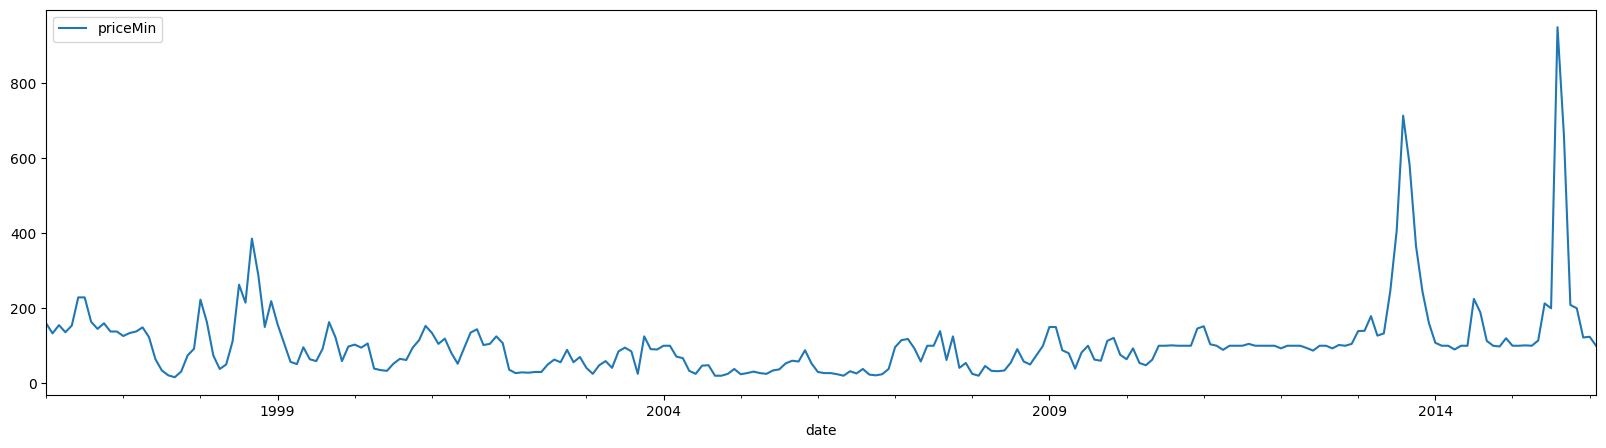

In [50]:
pricemin_data.plot(figsize=(20,5))

In [51]:
adf_test(pricemin_data['priceMin'])

ADF Statistics: -6.537016297705713
p- value: 9.552587859725773e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [52]:
a_ari=auto_arima(pricemin_data,trace=True,suppress_warnings=True)
a_ari.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2776.093, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2777.994, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2777.929, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2774.096, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2745.669, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2740.381, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2770.962, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2742.379, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2740.230, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2759.690, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2742.174, Time=1.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2748.770, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2742.742, Time=1.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1365.254
Date:                Thu, 30 May 2024   AIC                           2738.507
Time:                        14:28:19   BIC                           2752.446
Sample:                    01-01-1996   HQIC                          2744.123
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5137      0.086      5.976      0.000       0.345       0.682
ma.L1         -0.6856      0.078     -8.823      0.000      -0.838      -0.533
ma.L2         -0.2614      0.042     -6.205      0.000      -0.344      -0.179
sigma2      4848.9090     94.007     51.580      0.000    4664.658    5033.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44794.68
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.49   Skew:                             6.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
adf_test(pricemin_data['priceMin'])

ADF Statistics: -6.537016297705713
p- value: 9.552587859725773e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [55]:
pricemin_train=pricemin_data.iloc[:int(len(pricemin_data)*(70/100))]
pricemin_test=pricemin_data.iloc[int(len(pricemin_data)*(70/100)):]

## 1. **ARIMA**

In [56]:
pricemin_model_ARIMA=ARIMA(pricemin_train,order=(1,1,2))

In [57]:
pricemin_model_Arima_fit=pricemin_model_ARIMA.fit()

In [58]:
pricemin_model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               priceMin   No. Observations:                  169
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -847.683
Date:                Thu, 30 May 2024   AIC                           1703.366
Time:                        14:28:19   BIC                           1715.862
Sample:                    01-01-1996   HQIC                          1708.437
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6667      0.071      9.456      0.000       0.529       0.805
ma.L1         -0.9092      0.091    -10.020      0.000      -1.087      -0.731
ma.L2         -0.0471      0.071     -0.661      0.508      -0.187       0.092
sigma2      1404.5964    104.982     13.379      0.000    1198.835    1610.358
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               316.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
pred_start_date=pricemin_test.index[0]
pred_end_date=pricemin_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [60]:
pricemin_arima_pred=pricemin_model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
pricemin_residuals=pricemin_test['priceMin']-pricemin_arima_pred

In [61]:
pricemin_residuals

date
2010-02-01     26.916005
2010-03-01    -13.919632
2010-04-01    -21.143476
2010-05-01     -6.959430
2010-06-01     29.496562
                 ...    
2015-10-01    137.408316
2015-11-01    128.408316
2015-12-01     50.408316
2016-01-01     52.408316
2016-02-01     28.408316
Length: 73, dtype: float64

<Axes: xlabel='date'>

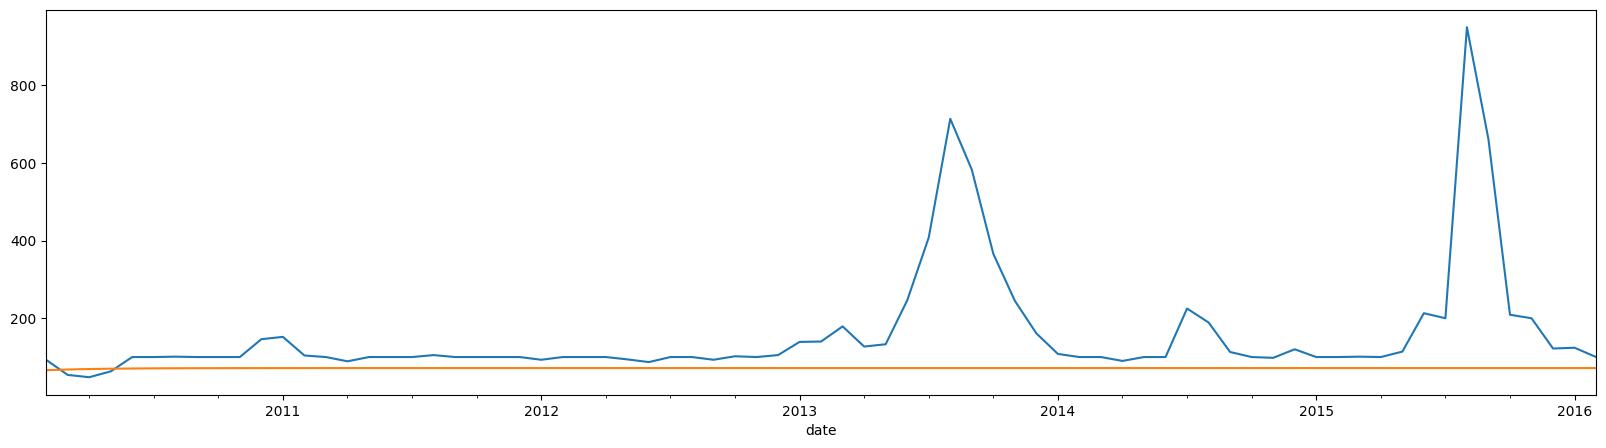

In [62]:
pricemin_test['priceMin'].plot(figsize=(20,5))
pricemin_arima_pred.plot(figsize=(20,5))

In [63]:
error(pricemin_test['priceMin'],pricemin_arima_pred)

MAE: 88.7859938962805
MSE: 30903.467574780767
RMSE: 175.79382120763165


## 2. **SRIMAX**

In [64]:
pricemin_model_SARIMA=SARIMAX(pricemin_train['priceMin'],order=(1,1,2),seasonal_order=(0,0,0,12))

In [65]:
pricemin_model_SARIMA_fit=pricemin_model_SARIMA.fit()

In [66]:
pricemin_model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               priceMin   No. Observations:                  169
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -847.683
Date:                Thu, 30 May 2024   AIC                           1703.366
Time:                        14:28:20   BIC                           1715.862
Sample:                    01-01-1996   HQIC                          1708.437
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6667      0.071      9.456      0.000       0.529       0.805
ma.L1         -0.9092      0.091    -10.020      0.000      -1.087      -0.731
ma.L2         -0.0471      0.071     -0.661      0.508      -0.187       0.092
sigma2      1404.5964    104.982     13.379      0.000    1198.835    1610.358
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               316.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_start_date=pricemin_test.index[0]
pred_end_date=pricemin_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [68]:
pricemin_srimax_pred=pricemin_model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
pricemin_srimax_residuals=pricemin_test['priceMin']-pricemin_srimax_pred

In [69]:
pricemin_srimax_residuals

date
2010-02-01     26.916005
2010-03-01    -13.919632
2010-04-01    -21.143476
2010-05-01     -6.959430
2010-06-01     29.496562
                 ...    
2015-10-01    137.408316
2015-11-01    128.408316
2015-12-01     50.408316
2016-01-01     52.408316
2016-02-01     28.408316
Length: 73, dtype: float64

<Axes: xlabel='date'>

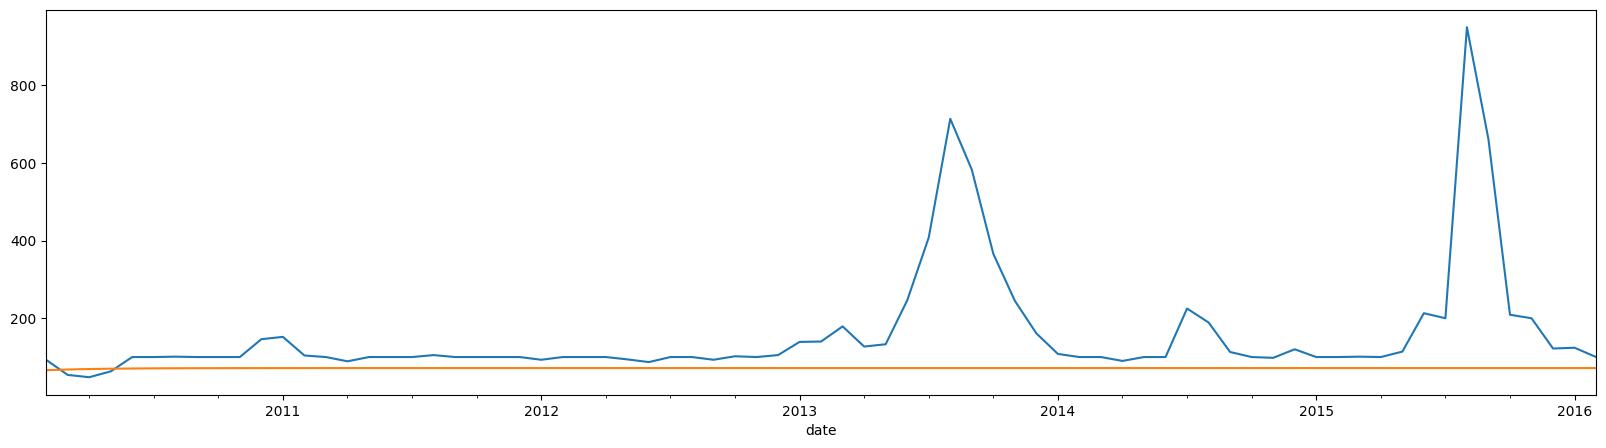

In [70]:
pricemin_test['priceMin'].plot(figsize=(20,5))
pricemin_srimax_pred.plot(figsize=(20,5))

In [71]:
error(pricemin_test['priceMin'],pricemin_srimax_pred)

MAE: 88.7859938962805
MSE: 30903.467574780767
RMSE: 175.79382120763165


## 3. **Prophet**

In [72]:
ph_pricemin_train=pricemin_train.reset_index()
ph_pricemin_train.columns = ['ds','y']

In [73]:
pricemin_m = Prophet()
pricemin_m.fit(ph_pricemin_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/5i1hxqsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/cy7_7ngh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70789', 'data', 'file=/tmp/tmpqz1odgjr/5i1hxqsc.json', 'init=/tmp/tmpqz1odgjr/cy7_7ngh.json', 'output', 'file=/tmp/tmpqz1odgjr/prophet_modeltsk4bwc7/prophet_model-20240530142821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
pricemin_future = pricemin_m.make_future_dataframe(periods=73,freq='M')
pricemin_future.tail()

,ds
237,2015-09-30
238,2015-10-31
239,2015-11-30
240,2015-12-31
241,2016-01-31


In [75]:
pricemin_forecast = pricemin_m.predict(pricemin_future)
pricemin_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
237,2015-09-30,56.712466,19.134047,140.561866,49.506221,63.536235,24.187263,24.187263,24.187263,24.187263,24.187263,24.187263,0.0,0.0,0.0,80.899729
238,2015-10-31,56.682401,-10.829978,106.030748,49.348459,63.541213,-5.574465,-5.574465,-5.574465,-5.574465,-5.574465,-5.574465,0.0,0.0,0.0,51.107936
239,2015-11-30,56.653306,12.803816,130.035314,49.182370,63.650384,12.729359,12.729359,12.729359,12.729359,12.729359,12.729359,0.0,0.0,0.0,69.382665
240,2015-12-31,56.623240,9.812712,127.615291,48.899731,63.744002,13.347563,13.347563,13.347563,13.347563,13.347563,13.347563,0.0,0.0,0.0,69.970803
241,2016-01-31,56.593175,-4.057203,118.612120,48.638896,63.821376,3.212904,3.212904,3.212904,3.212904,3.212904,3.212904,0.0,0.0,0.0,59.806079


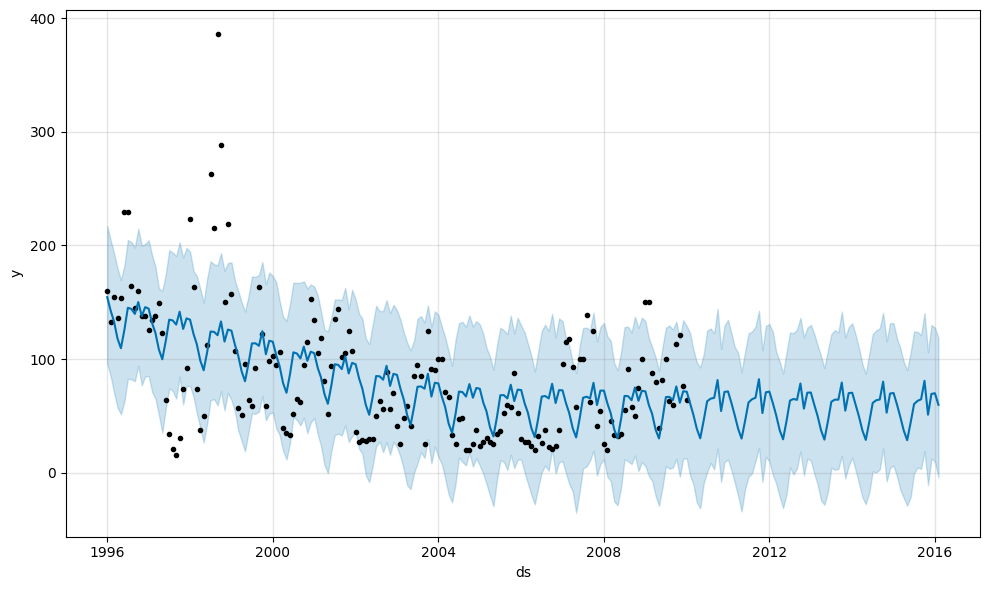

In [76]:
pricemin_fig1 = pricemin_m.plot(pricemin_forecast)

<Axes: xlabel='ds'>

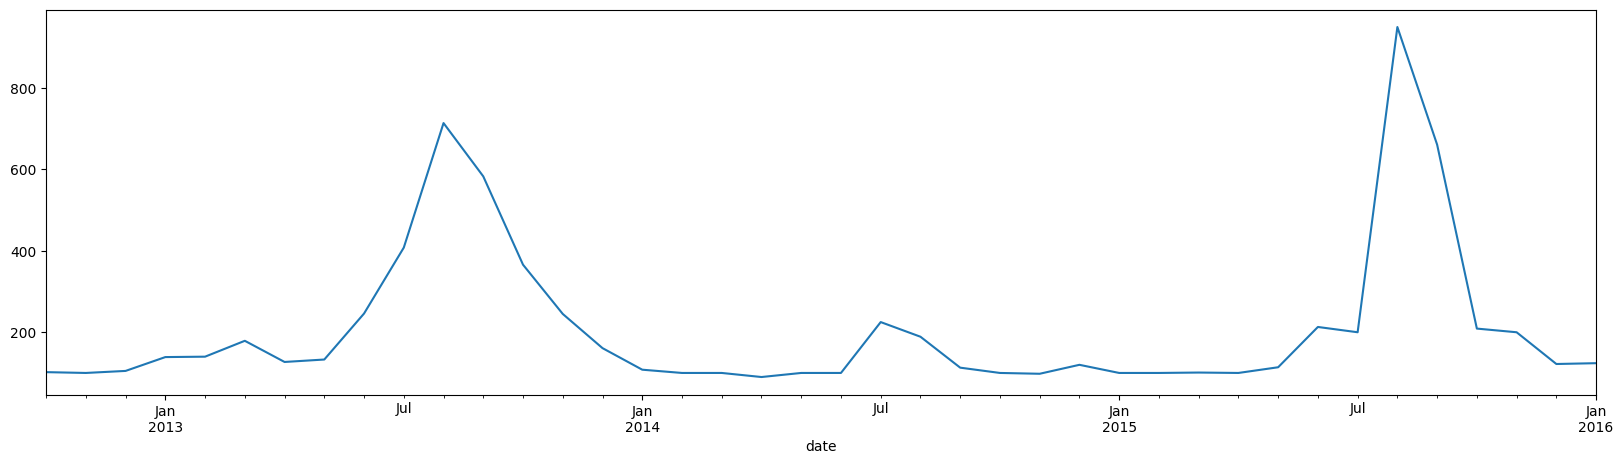

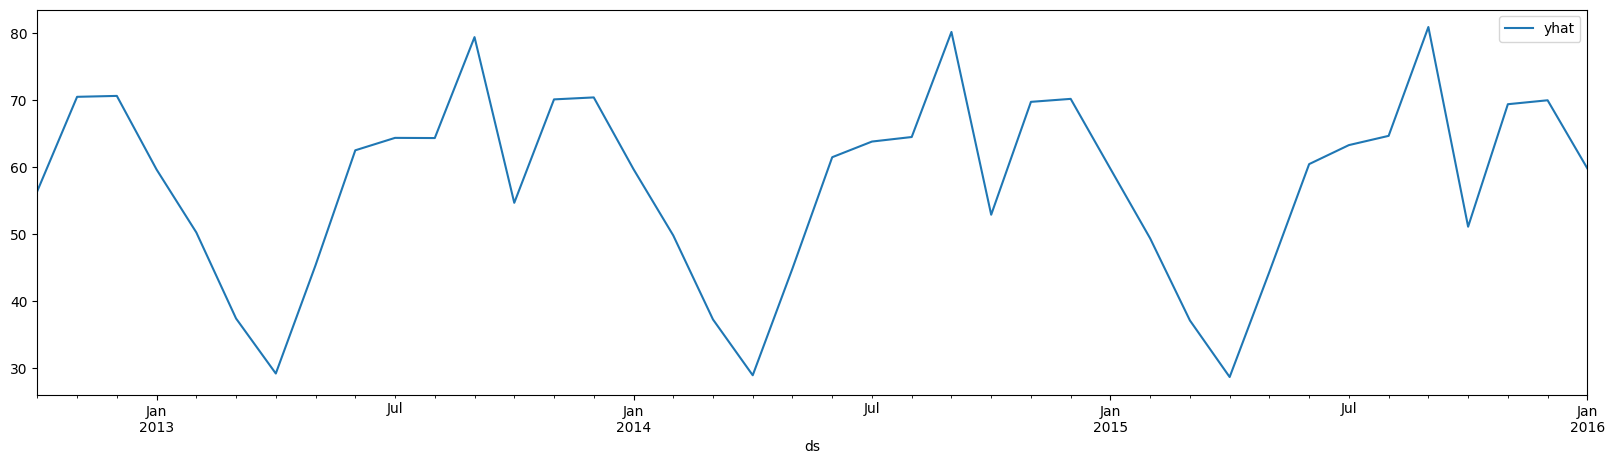

In [77]:
pricemin_test['priceMin'].loc['2012-10-01':'2016-01-01'].plot(figsize=(20,5))
pricemin_forecast[['ds','yhat']].loc['2010-01-31':].set_index('ds').plot(figsize=(20,5))

# **PriceMax**

In [78]:
pricemax_data=data['priceMax'].groupby('date').max('priceMax').reset_index()

In [79]:
pricemax_data.set_index('date',inplace=True)

<Axes: xlabel='date'>

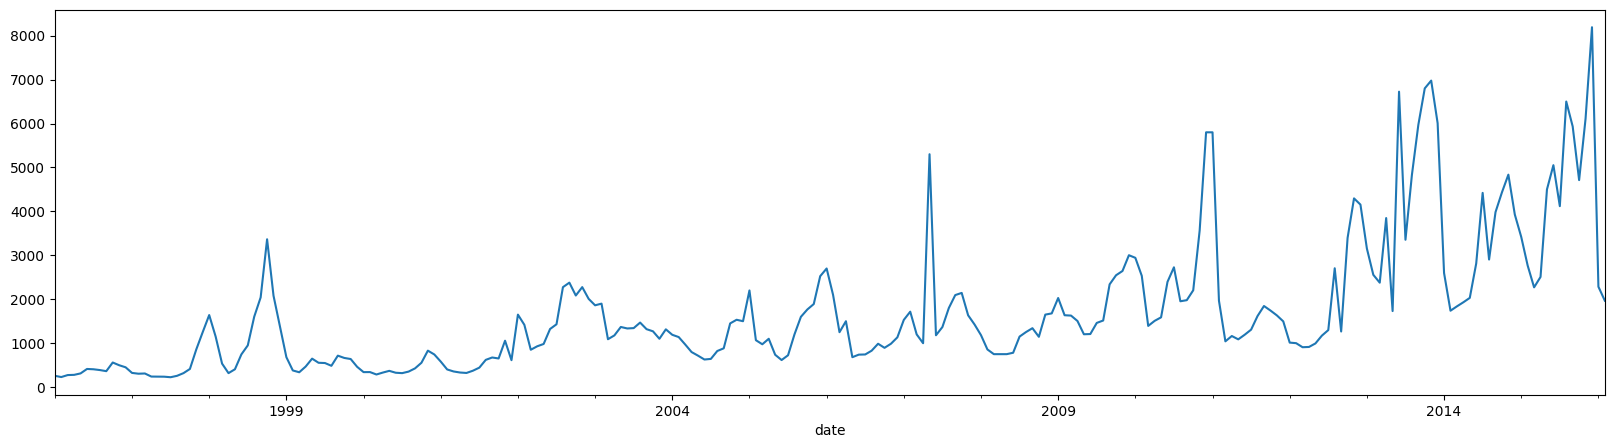

In [80]:
pricemax_data['priceMax'].plot(figsize=(20,5))

In [81]:
adf_test(pricemax_data['priceMax'])

ADF Statistics: -1.4133961269992261
p- value: 0.5758372644154466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [82]:
a_ari=auto_arima(pricemax_data['priceMax'],trace=True,suppress_warnings=True)
a_ari.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3989.018, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3976.293, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3972.936, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3987.033, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3948.544, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3969.019, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3975.398, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3951.640, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.456 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1970.272
Date:                Thu, 30 May 2024   AIC                           3948.544
Time:                        14:28:26   BIC                           3962.483
Sample:                    01-01-1996   HQIC                          3954.160
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.7190      2.919      1.960      0.050      -0.001      11.439
ar.L1          0.6122      0.053     11.525      0.000       0.508       0.716
ma.L1         -0.9767      0.016    -59.442      0.000      -1.009      -0.944
sigma2      7.341e+05   4.53e+04     16.210      0.000    6.45e+05    8.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               832.29
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              12.98   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
pricemax_train=pricemax_data.iloc[:int(len(pricemax_data)*(70/100))]
pricemax_test=pricemax_data.iloc[int(len(pricemax_data)*(70/100)):]

## 1. **ARIMA**

In [84]:
pricemax_model_ARIMA=ARIMA(pricemax_train,order=(1,1,1))

In [85]:
pricemax_model_Arima_fit=pricemax_model_ARIMA.fit()

In [86]:
pricemax_model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               priceMax   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1290.214
Date:                Thu, 30 May 2024   AIC                           2586.427
Time:                        14:28:26   BIC                           2595.799
Sample:                    01-01-1996   HQIC                          2590.231
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.081      7.259      0.000       0.432       0.751
ma.L1         -0.9424      0.068    -13.940      0.000      -1.075      -0.810
sigma2      2.726e+05   8910.679     30.598      0.000    2.55e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):              5492.68
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
pred_start_date=pricemax_test.index[0]
pred_end_date=pricemax_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [88]:
pricemax_arima_pred=pricemax_model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
pricemax_residuals=pricemax_test['priceMax']-pricemax_arima_pred

In [89]:
pricemax_residuals

date
2010-02-01      37.136163
2010-03-01    -838.384919
2010-04-01    -566.946894
2010-05-01    -394.414544
2010-06-01     468.317902
                 ...     
2015-10-01    2863.567855
2015-11-01    4259.567855
2015-12-01    6343.567855
2016-01-01     436.567855
2016-02-01     118.567855
Length: 73, dtype: float64

<Axes: xlabel='date'>

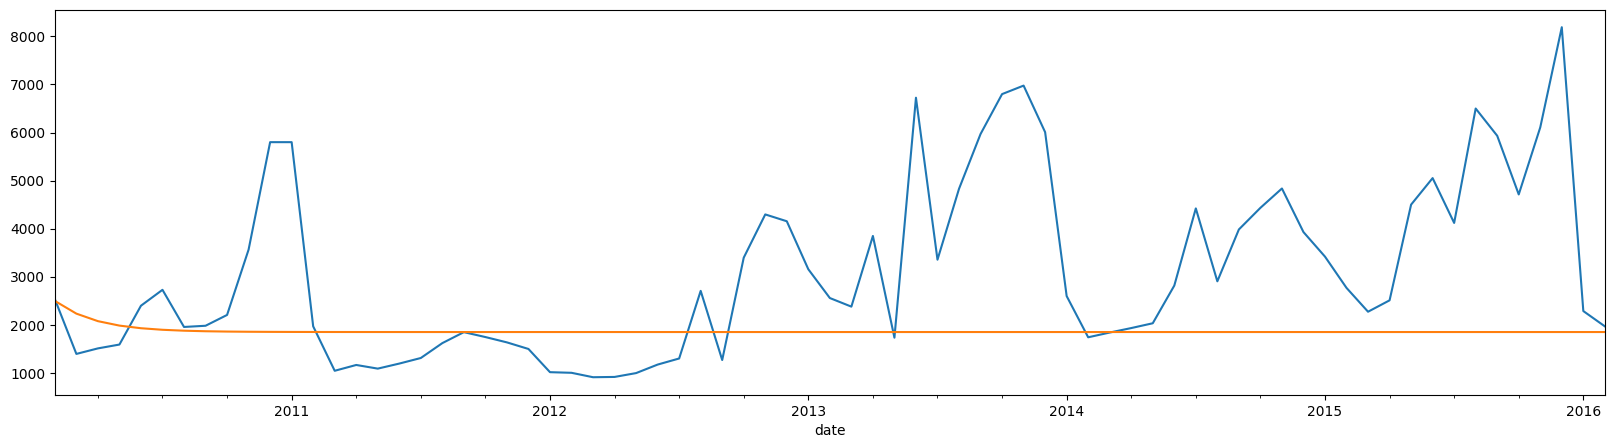

In [90]:
pricemax_test['priceMax'].plot(figsize=(20,5))
pricemax_arima_pred.plot(figsize=(20,5))

In [91]:
error(pricemax_test['priceMax'],pricemax_arima_pred)

MAE: 1554.652778917114
MSE: 4797792.916499184
RMSE: 2190.38647651486


## 2. **SRIMAX**

In [92]:
pricemax_model_SARIMA=SARIMAX(pricemax_train['priceMax'],order=(1,1,1),seasonal_order=(0,0,0,12))

In [93]:
pricemax_model_SARIMA_fit=pricemax_model_SARIMA.fit()

In [94]:
pricemax_model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               priceMax   No. Observations:                  169
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1290.214
Date:                Thu, 30 May 2024   AIC                           2586.427
Time:                        14:28:27   BIC                           2595.799
Sample:                    01-01-1996   HQIC                          2590.231
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5915      0.081      7.259      0.000       0.432       0.751
ma.L1         -0.9424      0.068    -13.940      0.000      -1.075      -0.810
sigma2      2.726e+05   8910.679     30.598      0.000    2.55e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):              5492.68
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               4.50   Skew:                             2.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
pred_start_date=pricemax_test.index[0]
pred_end_date=pricemax_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2010-02-01 00:00:00
2016-02-01 00:00:00


In [96]:
pricemax_srimax_pred=pricemax_model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
pricemax_srimax_residuals=pricemax_test['priceMax']-pricemax_srimax_pred

In [97]:
pricemax_srimax_residuals

date
2010-02-01      37.136163
2010-03-01    -838.384919
2010-04-01    -566.946894
2010-05-01    -394.414544
2010-06-01     468.317902
                 ...     
2015-10-01    2863.567855
2015-11-01    4259.567855
2015-12-01    6343.567855
2016-01-01     436.567855
2016-02-01     118.567855
Length: 73, dtype: float64

<Axes: xlabel='date'>

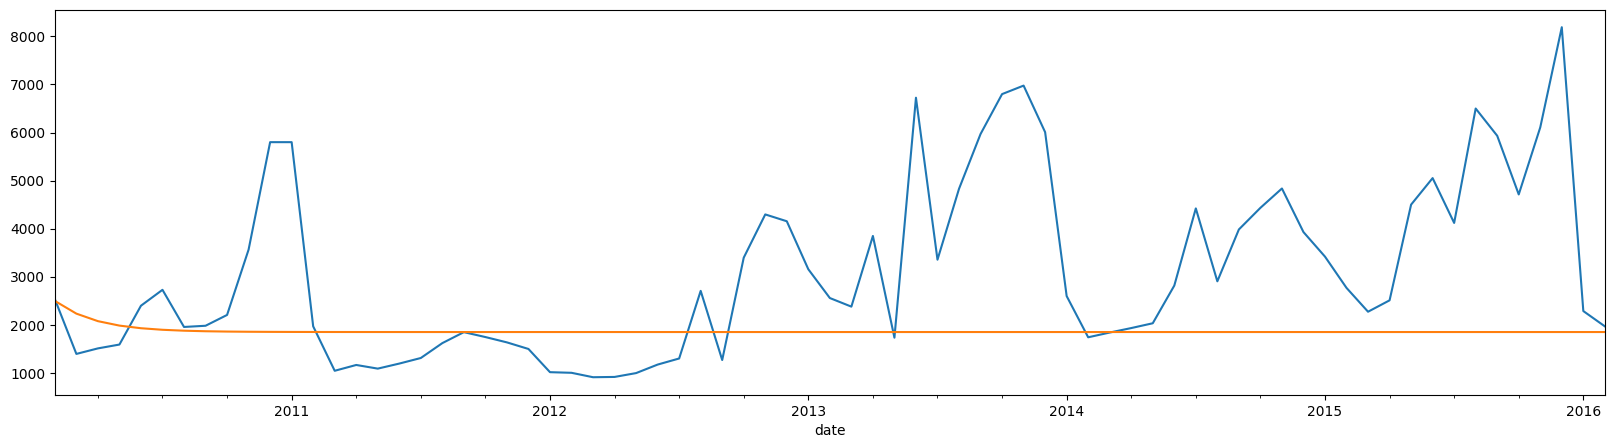

In [98]:
pricemax_test['priceMax'].plot(figsize=(20,5))
pricemax_srimax_pred.plot(figsize=(20,5))

In [99]:
error(pricemax_test['priceMax'],pricemax_srimax_pred)

MAE: 1554.652778917114
MSE: 4797792.916499184
RMSE: 2190.38647651486


## 3. **Prophet**

In [100]:
ph_pricemax_train=pricemax_train.reset_index()
ph_pricemax_train.columns = ['ds','y']

In [101]:
pricemax_m = Prophet()
pricemax_m.fit(ph_pricemax_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/ufco51n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqz1odgjr/n7qfdu4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53168', 'data', 'file=/tmp/tmpqz1odgjr/ufco51n9.json', 'init=/tmp/tmpqz1odgjr/n7qfdu4m.json', 'output', 'file=/tmp/tmpqz1odgjr/prophet_modelwdo023t_/prophet_model-20240530142828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [102]:
pricemax_future = pricemax_m.make_future_dataframe(periods=73,freq='M')
pricemax_future.tail()

,ds
237,2015-09-30
238,2015-10-31
239,2015-11-30
240,2015-12-31
241,2016-01-31


In [103]:
pricemax_forecast = pricemax_m.predict(pricemax_future)
pricemax_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
237,2015-09-30,2272.558609,1956.057001,3398.093083,2272.527418,2272.592431,402.038518,402.038518,402.038518,402.038518,402.038518,402.038518,0.0,0.0,0.0,2674.597127
238,2015-10-31,2280.509842,1918.954030,3377.664126,2280.478059,2280.544304,311.877361,311.877361,311.877361,311.877361,311.877361,311.877361,0.0,0.0,0.0,2592.387203
239,2015-11-30,2288.204584,1855.168084,3339.996061,2288.172186,2288.239777,301.054372,301.054372,301.054372,301.054372,301.054372,301.054372,0.0,0.0,0.0,2589.258956
240,2015-12-31,2296.155817,1768.285213,3172.277294,2296.122527,2296.191598,181.815347,181.815347,181.815347,181.815347,181.815347,181.815347,0.0,0.0,0.0,2477.971164
241,2016-01-31,2304.107050,1514.313689,3014.812192,2304.072819,2304.143517,-10.850045,-10.850045,-10.850045,-10.850045,-10.850045,-10.850045,0.0,0.0,0.0,2293.257006


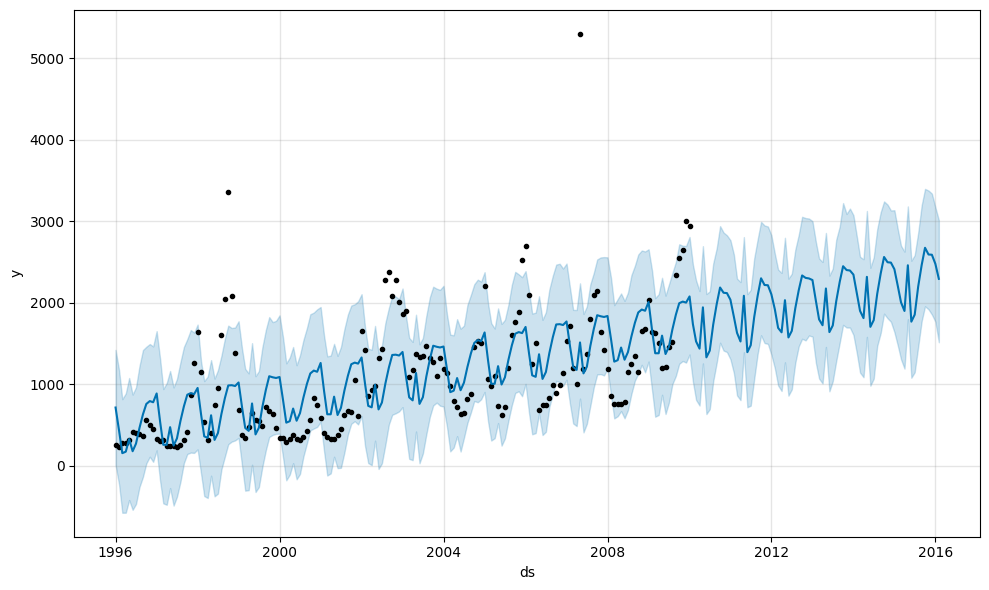

In [104]:
pricemax_fig1 = pricemax_m.plot(pricemax_forecast)

<Axes: xlabel='ds'>

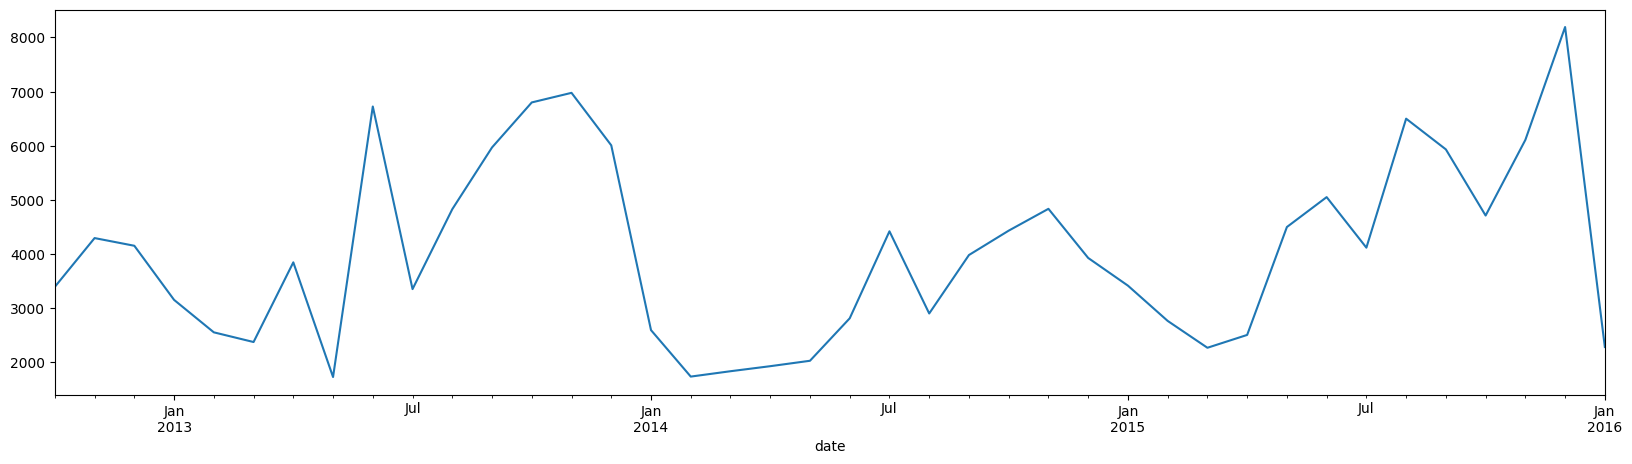

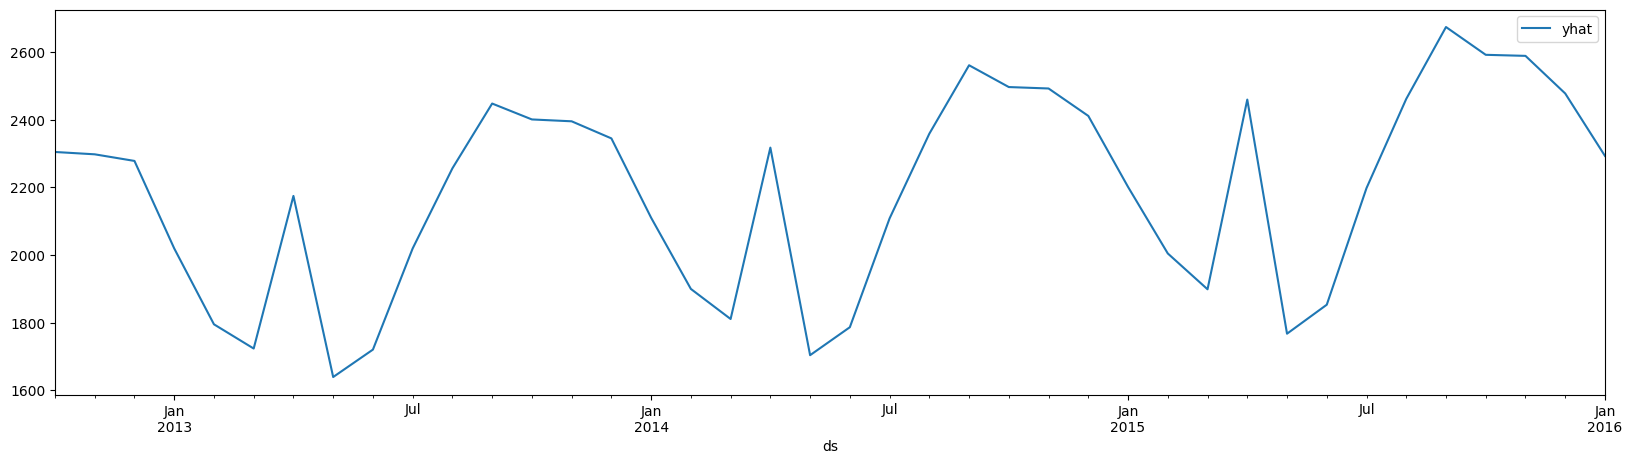

In [105]:
pricemax_test['priceMax'].loc['2012-10-01':'2016-01-01'].plot(figsize=(20,5))
pricemax_forecast[['ds','yhat']].loc['2010-01-31':].set_index('ds').plot(figsize=(20,5))